# SVM 

### Building a SVM model

#### Reading the data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

iris_data = pd.read_csv("C:\\D\\infosys\\iris.csv")


In [3]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Feature Engineering

In [4]:
v_nv_fn = lambda x: 0 if x == "versicolor" else 1

iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data["v_nv"] == 0 ].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


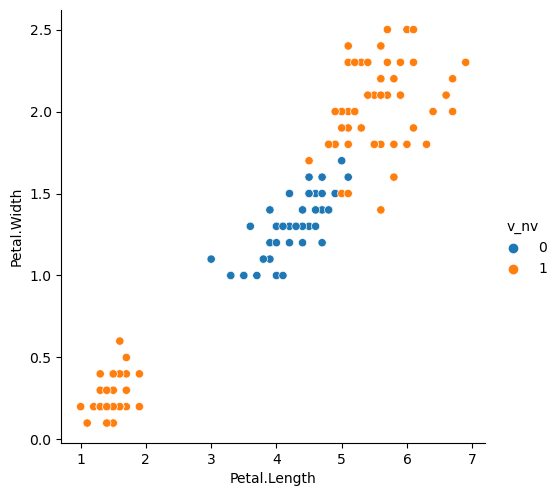

In [5]:
import seaborn as sns
sns.pairplot(iris_data, x_vars = "Petal.Length", y_vars = "Petal.Width", hue = "v_nv", height = 5)

In [6]:
from sklearn.svm import SVC
X = iris_data[["Petal.Length", "Petal.Width"]]
Y = iris_data["v_nv"]

model = SVC()
model.fit(X, Y)
model.score(X, Y)

0.9533333333333334

C:\Users\VISHAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


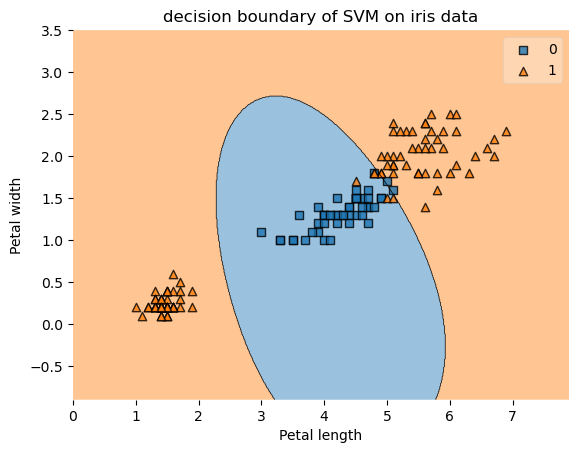

In [7]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features, target, clf = model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("decision boundary of SVM on iris data")
plt.show()

In [9]:
iris_data.loc[iris_data.Species == "setosa", "Species"] = 0
iris_data.loc[iris_data.Species == "versicolor", "Species"] = 1
iris_data.loc[iris_data.Species == "virginica", "Species"] = 2
iris_data.Species = iris_data.Species.astype("category")
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [12]:
X = iris_data[["Petal.Length", "Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X, Y)        

SVC()

C:\Users\VISHAL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


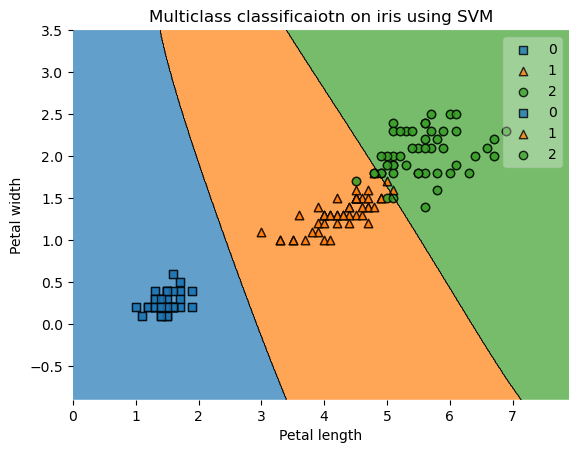

In [16]:
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features, target , clf = model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Multiclass classificaiotn on iris using SVM")
plt.show()